In [3]:
import pandas as pd

In [5]:
import numpy as np

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("Quality_of_Life.csv")
df.head()

,country,Purchasing Power Value,Purchasing Power Category,Safety Value,Safety Category,Health Care Value,Health Care Category,Climate Value,Climate Category,Cost of Living Value,Cost of Living Category,Property Price to Income Value,Property Price to Income Category,Traffic Commute Time Value,Traffic Commute Time Category,Pollution Value,Pollution Category,Quality of Life Value,Quality of Life Category
0,Afghanistan,32.15,'Very Low',25.33,'Low',24.24,'Low',0.00,NaN,21.08,'Very Low',7.8,'Low',56.17,'Very High',84.44,'Very High',0.0,NaN
1,Aland Islands,125.01,'Very High',71.81,'High',79.72,'High',0.00,NaN,53.44,'Low',5.33,'Low',19.05,'Very Low',18.05,'Very Low',0.0,NaN
2,Albania,42.82,'Low',55.52,'Moderate',48.21,'Moderate',86.43,'Very High',40.85,'Low',14.88,'High',36.74,'Moderate',77.25,'High',': 104.16','Low'
3,Alderney,0.00,NaN,83.79,'Very High',100.00,'Very High',0.00,NaN,0.00,NaN,0.0,NaN,5.00,'Very Low',1.72,'Very Low',0.0,NaN
4,Algeria,27.60,'Very Low',47.54,'Moderate',54.43,'Moderate',94.82,'Very High',25.31,'Very Low',21.7,'Very High',45.09,'High',63.87,'High',': 98.83','Very Low'


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   country                            236 non-null    object 
 1   Purchasing Power Value             236 non-null    float64
 2   Purchasing Power Category          190 non-null    object 
 3   Safety Value                       236 non-null    float64
 4   Safety Category                    234 non-null    object 
 5   Health Care Value                  236 non-null    float64
 6   Health Care Category               221 non-null    object 
 7   Climate Value                      236 non-null    float64
 8   Climate Category                   114 non-null    object 
 9   Cost of Living Value               236 non-null    float64
 10  Cost of Living Category            191 non-null    object 
 11  Property Price to Income Value     236 non-null    object 

In [13]:
df.describe()

,Purchasing Power Value,Safety Value,Health Care Value,Climate Value,Cost of Living Value,Traffic Commute Time Value,Pollution Value
count,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000
mean,55.573305,55.274449,54.731568,37.598178,37.526314,28.492966,54.266186
std,52.008245,16.914298,20.607381,40.851542,26.026565,17.347242,25.853695
min,0.000000,0.000000,0.000000,-3.540000,0.000000,0.000000,0.000000
25%,16.340000,43.857500,45.807500,0.000000,24.550000,17.100000,35.700000
50%,42.930000,54.635000,57.150000,0.000000,36.895000,29.845000,59.765000
75%,85.940000,68.132500,68.447500,79.332500,51.090000,38.870000,73.740000
max,281.830000,100.000000,100.000000,99.890000,137.370000,100.000000,106.900000


In [63]:
#Data Cleaning

In [15]:
df.isnull().sum()

country                                0
Purchasing Power Value                 0
Purchasing Power Category             46
Safety Value                           0
Safety Category                        2
Health Care Value                      0
Health Care Category                  15
Climate Value                          0
Climate Category                     122
Cost of Living Value                   0
Cost of Living Category               45
Property Price to Income Value         0
Property Price to Income Category     21
Traffic Commute Time Value             0
Traffic Commute Time Category         29
Pollution Value                        0
Pollution Category                    10
Quality of Life Value                  0
Quality of Life Category             122
dtype: int64

In [41]:
# dropping columns with too much missing data values

df = df.drop(['Climate_Category','Quality_of_Life_Category'],axis=1)

In [43]:
# standardize column names 
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['country', 'Purchasing_Power_Value', 'Purchasing_Power_Category',
       'Safety_Value', 'Safety_Category', 'Health_Care_Value',
       'Health_Care_Category', 'Climate_Value', 'Cost_of_Living_Value',
       'Cost_of_Living_Category', 'Property_Price_to_Income_Value',
       'Property_Price_to_Income_Category', 'Traffic_Commute_Time_Value',
       'Traffic_Commute_Time_Category', 'Pollution_Value',
       'Pollution_Category', 'Quality_of_Life_Value'],
      dtype='object')

In [45]:
df.columns[df.isna().any()]

Index(['Purchasing_Power_Category', 'Safety_Category', 'Health_Care_Category',
       'Cost_of_Living_Category', 'Property_Price_to_Income_Category',
       'Traffic_Commute_Time_Category', 'Pollution_Category'],
      dtype='object')

In [47]:
# handling missing values in categorical columns

#1. Function to replace NAN values with mode value
def impute_nan_most_frequent_category(df,ColName):
    # .mode()[0] - gives first category name
     most_frequent_category=df[ColName].mode()[0]
    
    # replace nan values with most occured category
     df[ColName + "_Imputed"] = df[ColName]
     df[ColName + "_Imputed"].fillna(most_frequent_category,inplace=True)
#2. Call function to impute most occured category
for Columns in ['Purchasing_Power_Category', 'Safety_Category', 'Health_Care_Category',
       'Cost_of_Living_Category', 'Property_Price_to_Income_Category',
       'Traffic_Commute_Time_Category', 'Pollution_Category']:
    impute_nan_most_frequent_category(df,Columns)
    
# Display imputed result
df[['Purchasing_Power_Category', 'Safety_Category', 'Health_Care_Category',
       'Cost_of_Living_Category', 'Property_Price_to_Income_Category',
       'Traffic_Commute_Time_Category', 'Pollution_Category', 'Purchasing_Power_Category_Imputed', 'Safety_Category_Imputed', 'Health_Care_Category_Imputed',
       'Cost_of_Living_Category_Imputed', 'Property_Price_to_Income_Category_Imputed',
       'Traffic_Commute_Time_Category_Imputed', 'Pollution_Category_Imputed']].head(10)
#3. Drop actual columns
df = df.drop(['Purchasing_Power_Category', 'Safety_Category', 'Health_Care_Category',
       'Cost_of_Living_Category', 'Property_Price_to_Income_Category',
       'Traffic_Commute_Time_Category', 'Pollution_Category'], axis = 1)

/var/folders/rz/_8rrtrcn3dlgkrx3cp8kfsg00000gn/T/ipykernel_11241/1576582305.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[ColName + "_Imputed"].fillna(most_frequent_category,inplace=True)
/var/folders/rz/_8rrtrcn3dlgkrx3cp8kfsg00000gn/T/ipykernel_11241/1576582305.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we a

In [51]:
df.isnull().sum()

country                                      0
Purchasing_Power_Value                       0
Safety_Value                                 0
Health_Care_Value                            0
Climate_Value                                0
Cost_of_Living_Value                         0
Property_Price_to_Income_Value               0
Traffic_Commute_Time_Value                   0
Pollution_Value                              0
Quality_of_Life_Value                        0
Purchasing_Power_Category_Imputed            0
Safety_Category_Imputed                      0
Health_Care_Category_Imputed                 0
Cost_of_Living_Category_Imputed              0
Property_Price_to_Income_Category_Imputed    0
Traffic_Commute_Time_Category_Imputed        0
Pollution_Category_Imputed                   0
dtype: int64

In [ ]:
df['Property_Price_to_Income_Value'] = df['Property_Price_to_Income_Value'].str.replace(',', '')
df['Property_Price_to_Income_Value'] = df['Property_Price_to_Income_Value'].str.strip("'")
df['Property_Price_to_Income_Value'] = df['Property_Price_to_Income_Value'].astype('float64')

In [163]:
df['Quality_of_Life_Value'] = df['Quality_of_Life_Value'].str.replace(',', '')
df['Quality_of_Life_Value'] = df['Quality_of_Life_Value'].str.strip("'")
df['Quality_of_Life_Value'] = df['Quality_of_Life_Value'].str.strip(" ")
df['Quality_of_Life_Value'] = df['Quality_of_Life_Value'].str.strip(":")
df['Quality_of_Life_Value'] = df['Quality_of_Life_Value'].astype('float64')

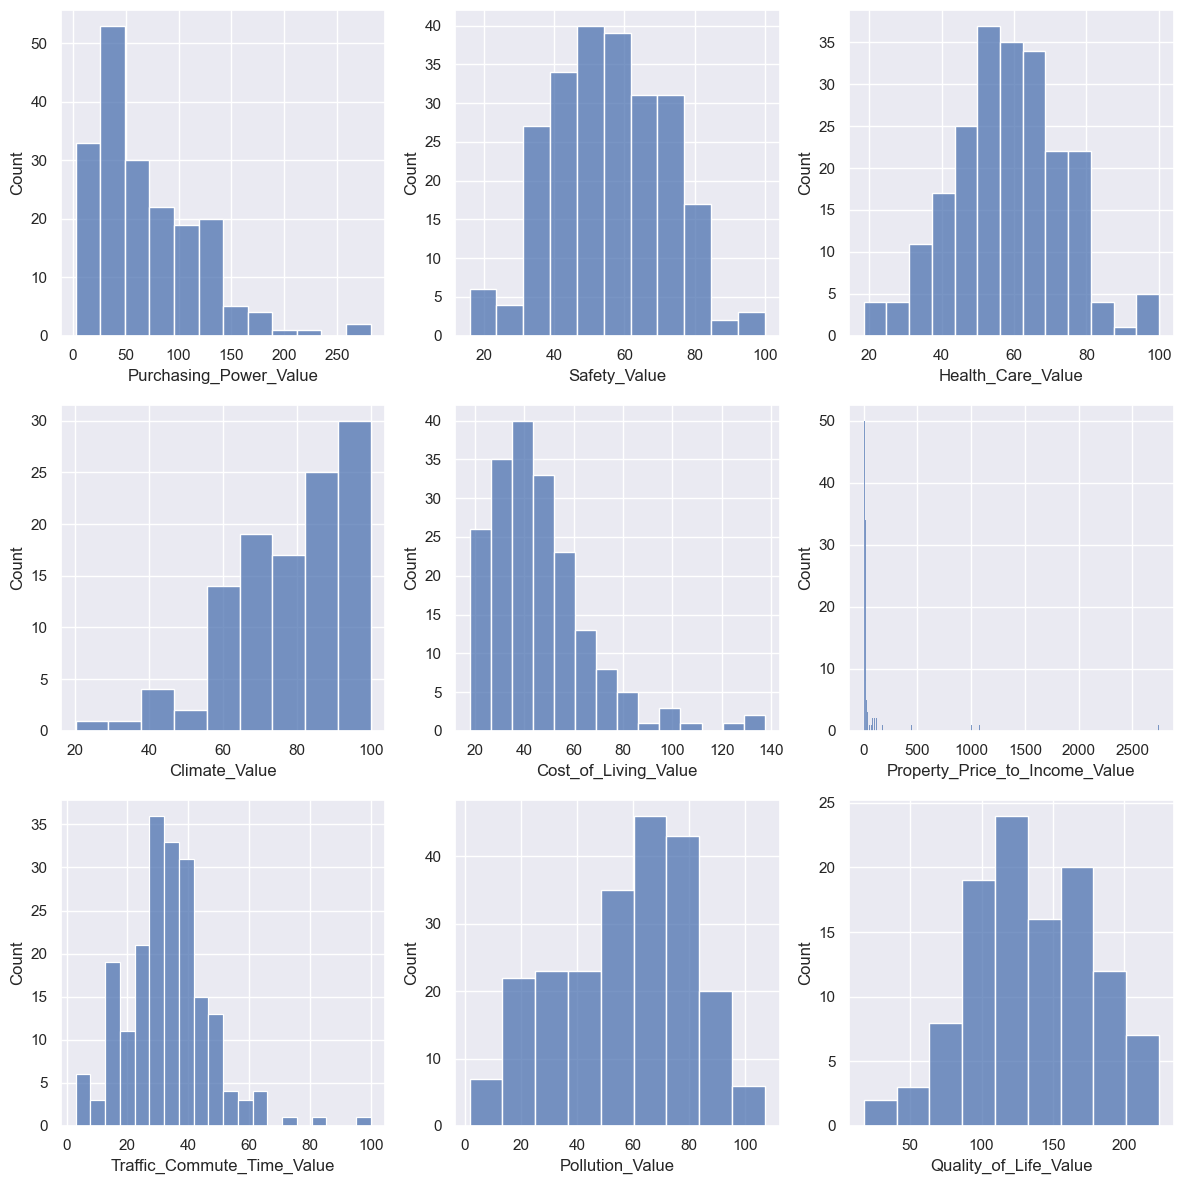

In [287]:
sns.set_theme(style="darkgrid")
f, axes = plt.subplots(3, 3, figsize=(12, 12))
sns.histplot(data=df[df['Purchasing_Power_Value']> 0]['Purchasing_Power_Value'],ax=axes[0][0])
sns.histplot(data=df[df['Safety_Value']> 0]['Safety_Value'],ax=axes[0][1])
sns.histplot(data=df[df['Health_Care_Value']> 0]['Health_Care_Value'],ax=axes[0][2])
sns.histplot(data=df[df['Climate_Value']> 0]['Climate_Value'],ax=axes[1][0])
sns.histplot(data=df[df['Cost_of_Living_Value']> 0]['Cost_of_Living_Value'],ax=axes[1][1])
sns.histplot(data=df[df['Property_Price_to_Income_Value']> 0]['Property_Price_to_Income_Value'],ax=axes[1][2])
sns.histplot(data=df[df['Traffic_Commute_Time_Value']> 0]['Traffic_Commute_Time_Value'],ax=axes[2][0])
sns.histplot(data=df[df['Pollution_Value']> 0]['Pollution_Value'],ax=axes[2][1])
sns.histplot(data=df[df['Quality_of_Life_Value']> 0]['Quality_of_Life_Value'],ax=axes[2][2])

f.tight_layout()

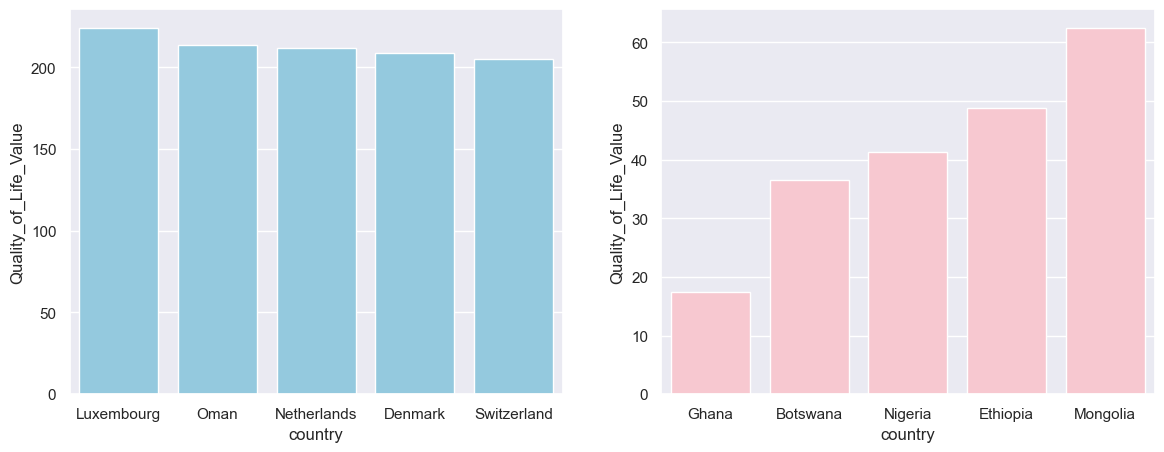

In [285]:
f, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.barplot(data = df.nlargest(5,'Quality_of_Life_Value'), x='country', y='Quality_of_Life_Value', color='skyblue', ax=axes[0])
sns.barplot(data = df[df['Quality_of_Life_Value'] > 0].nsmallest(5,'Quality_of_Life_Value'), x='country', y='Quality_of_Life_Value', color='pink', ax=axes[1])
plt.show()

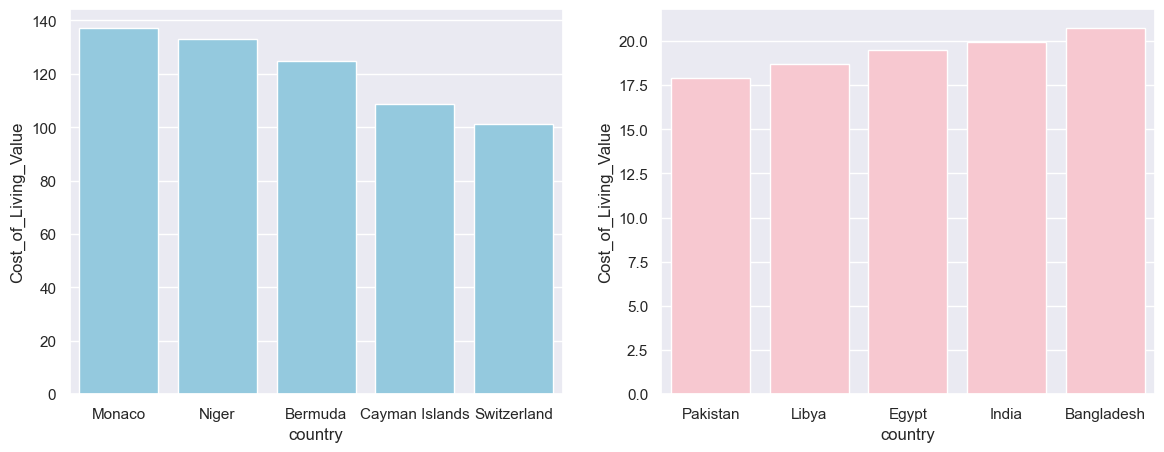

In [289]:
f, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.barplot(data = df.nlargest(5,'Cost_of_Living_Value'), x='country', y='Cost_of_Living_Value', color='skyblue', ax=axes[0])
sns.barplot(data = df[df['Cost_of_Living_Value'] > 0].nsmallest(5,'Cost_of_Living_Value'), x='country', y='Cost_of_Living_Value', color='pink', ax=axes[1])
plt.show()

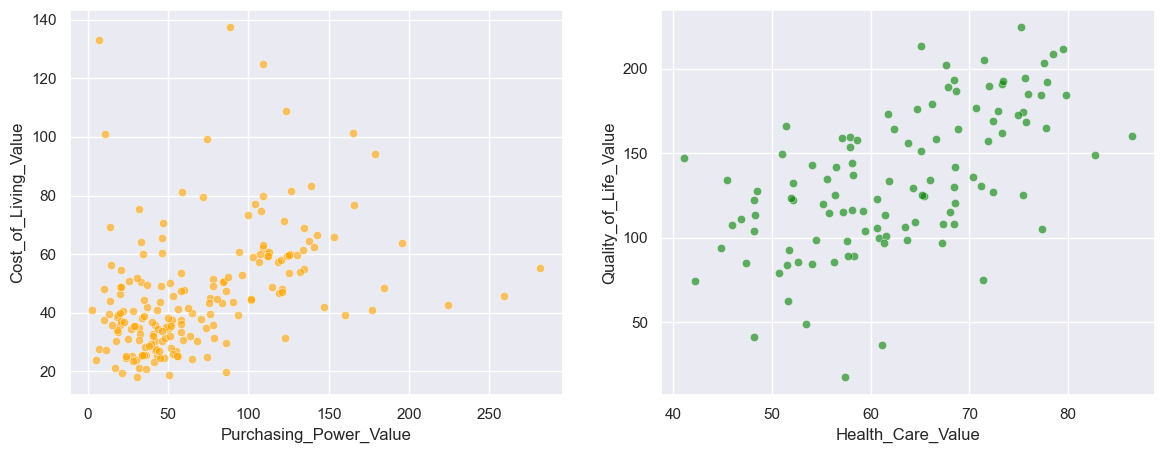

In [277]:
f, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.scatterplot(data=df[(df['Purchasing_Power_Value'] > 0) & (df['Cost_of_Living_Value'] > 0)], x = 'Purchasing_Power_Value', y = 'Cost_of_Living_Value', color='orange', ax=axes[0], alpha=0.6)
sns.scatterplot(data=df[(df['Health_Care_Value'] > 0) & (df['Quality_of_Life_Value'] > 0)], x = 'Health_Care_Value', y = 'Quality_of_Life_Value', color='green', ax=axes[1], alpha=0.6)
plt.show()



In [357]:
df_numeric_columns = df.select_dtypes(include=[np.number])
df_numeric_columns = df_numeric_columns[df_numeric_columns > 0]
corr_df = df_numeric_columns.corr(method='spearman')
corr_df

,Purchasing_Power_Value,Safety_Value,Health_Care_Value,Climate_Value,Cost_of_Living_Value,Property_Price_to_Income_Value,Traffic_Commute_Time_Value,Pollution_Value,Quality_of_Life_Value
Purchasing_Power_Value,1.000000,0.543185,0.556499,-0.179936,0.482931,-0.649241,-0.241265,-0.565481,0.913050
Safety_Value,0.543185,1.000000,0.554877,-0.323105,0.263142,-0.127606,-0.296508,-0.402539,0.580569
Health_Care_Value,0.556499,0.554877,1.000000,-0.017030,0.254785,-0.218759,-0.005170,-0.470865,0.612953
Climate_Value,-0.179936,-0.323105,-0.017030,1.000000,0.029917,0.119774,0.107269,0.013008,-0.039957
Cost_of_Living_Value,0.482931,0.263142,0.254785,0.029917,1.000000,-0.275821,-0.260354,-0.405685,0.702252
Property_Price_to_Income_Value,-0.649241,-0.127606,-0.218759,0.119774,-0.275821,1.000000,0.214071,0.390001,-0.705109
Traffic_Commute_Time_Value,-0.241265,-0.296508,-0.005170,0.107269,-0.260354,0.214071,1.000000,0.366782,-0.597967
Pollution_Value,-0.565481,-0.402539,-0.470865,0.013008,-0.405685,0.390001,0.366782,1.000000,-0.821516
Quality_of_Life_Value,0.913050,0.580569,0.612953,-0.039957,0.702252,-0.705109,-0.597967,-0.821516,1.000000


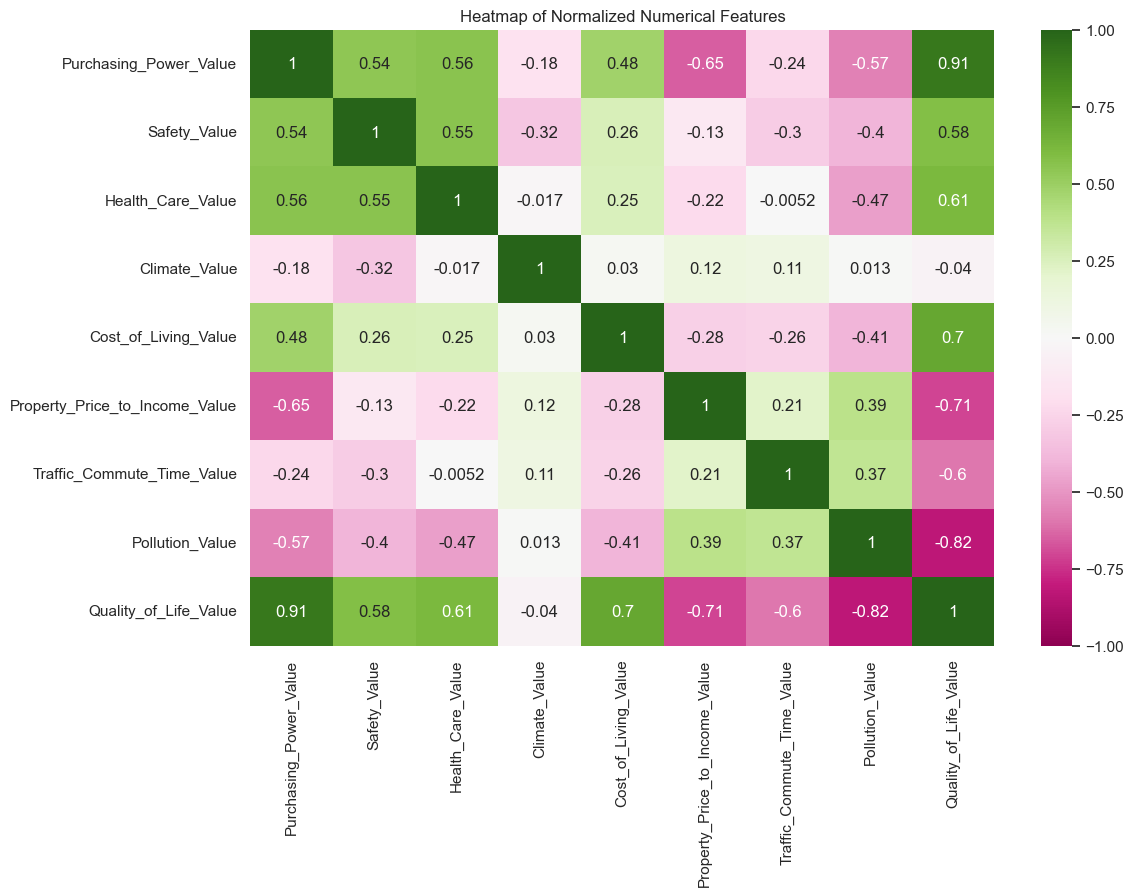

In [371]:
# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_df, cmap='PiYG', annot=True, vmin=-1, vmax=1)  # Set annot=True for values
plt.title("Heatmap of Normalized Numerical Features")
plt.show()

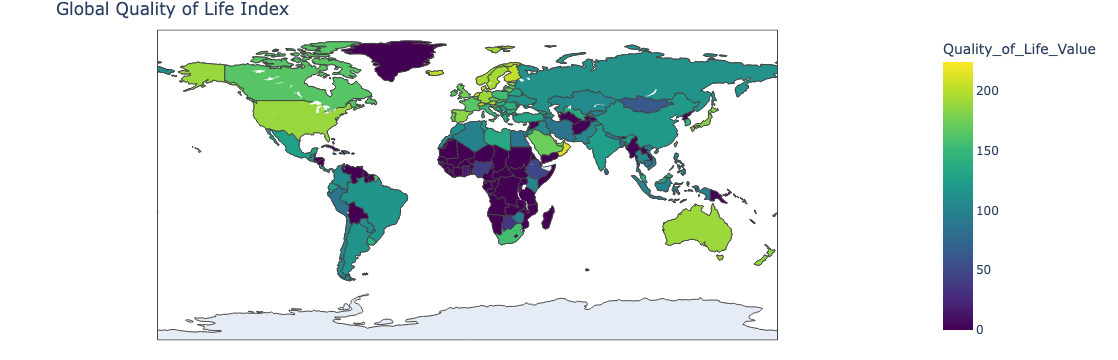

In [387]:
import plotly.express as px

# Ensure 'Quality of Life Value' is numeric
df["Quality_of_Life_Value"] = pd.to_numeric(df["Quality_of_Life_Value"], errors="coerce")

# Create choropleth map
fig = px.choropleth(
    df, 
    locations="country",  # Column with country names
    locationmode="country names",  # Use country names (can also use ISO-3 codes)
    color="Quality_of_Life_Value",  # The value to color countries
    hover_name="country",  # Display country name on hover
    color_continuous_scale="Viridis",  # Color theme
    title="Global Quality of Life Index"
)
fig.update_layout(margin=dict(l=20, r=30, t=30, b=20))
fig.show()

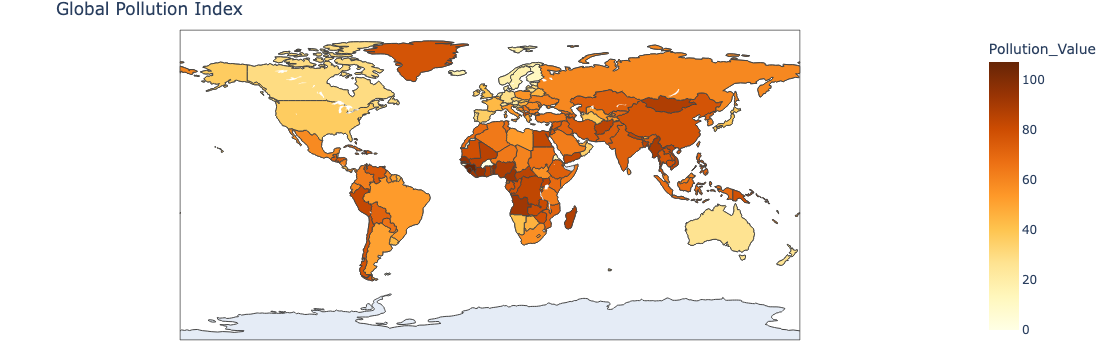

In [393]:
# Ensure 'Pollution_Value' is numeric
df["Pollution_Value"] = pd.to_numeric(df["Pollution_Value"], errors="coerce")

# Create choropleth map
fig = px.choropleth(
    df, 
    locations="country",  # Column with country names
    locationmode="country names",  # Use country names (can also use ISO-3 codes)
    color="Pollution_Value",  # The value to color countries
    hover_name="country",  # Display country name on hover
    color_continuous_scale="YlOrBr",  # Color theme
    title="Global Pollution Index"
)
fig.update_layout(margin=dict(l=20, r=30, t=30, b=20))
fig.show()